In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# Problem 1

In [2]:
dataset = pd.read_csv("train.csv")
display(dataset)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
extracted_data = dataset[["GrLivArea", "YearBuilt", "SalePrice"]]
display(extracted_data)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# Problem 2

In [5]:
dfX = extracted_data[extracted_data.columns[0:2]]
dfY = extracted_data[extracted_data.columns[2]]
X = dfX.to_numpy()
Y = dfY.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
display(X_train, X_train.shape)
display(X_test, X_test.shape)

array([[2392, 1997],
       [1991, 1932],
       [1118, 1977],
       ...,
       [2290, 2002],
       [1434, 2001],
       [1376, 1937]], dtype=int64)

(1095, 2)

array([[1192, 1920],
       [1173, 1974],
       [ 971, 1969],
       [1442, 1958],
       [1453, 1986],
       [1077, 1920],
       [1564, 1980],
       [ 990, 1994],
       [1414, 2004],
       [1200, 2004],
       [2263, 1998],
       [1405, 2003],
       [ 952, 1951],
       [2108, 1935],
       [1400, 1978],
       [1360, 1938],
       [1710, 2004],
       [2267, 2002],
       [1824, 1971],
       [ 988, 1961],
       [1214, 1965],
       [2287, 1953],
       [ 964, 1921],
       [1360, 1984],
       [1271, 1948],
       [1716, 1962],
       [1370, 2006],
       [2126, 1967],
       [1776, 1958],
       [1593, 2004],
       [1482, 1925],
       [ 912, 1961],
       [1022, 1910],
       [1200, 1995],
       [1212, 2001],
       [1690, 2000],
       [1656, 2006],
       [ 913, 1966],
       [1694, 2008],
       [1636, 2006],
       [1828, 2007],
       [1382, 1941],
       [1670, 2006],
       [1661, 1998],
       [1535, 1979],
       [1057, 1953],
       [ 990, 1994],
       [1456,

(365, 2)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [28]:
MSE_linear = mean_squared_error(Y_test, linear_regression.predict(X_test))
print("mean_squared_error:", MSE_linear)

mean_squared_error: 1796050393.540371


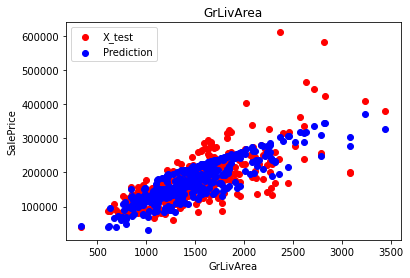

In [41]:
plt.scatter(X_test[:,0], Y_test, color = 'red')
plt.scatter(X_test[:,0], linear_regression.predict(X_test), color = 'blue')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

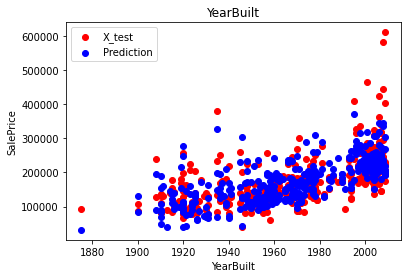

In [42]:
plt.scatter(X_test[:,1], Y_test, color = 'red')
plt.scatter(X_test[:,1], linear_regression.predict(X_test), color = 'blue')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

# Problem 3

## SVR

In [43]:
svr = SVR()
svr.fit(X_train, Y_train)

SVR()

In [44]:
MSE_svr = mean_squared_error(Y_test, svr.predict(X_test))
print("mean_squared_error:", MSE_svr)

mean_squared_error: 5560117403.361876


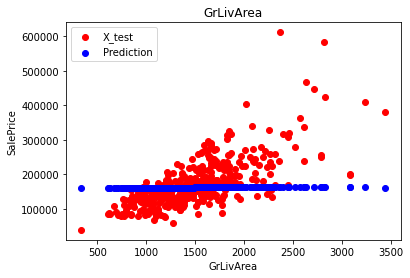

In [45]:
plt.scatter(X_test[:,0], Y_test, color = 'red')
plt.scatter(X_test[:,0], svr.predict(X_test), color = 'blue')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

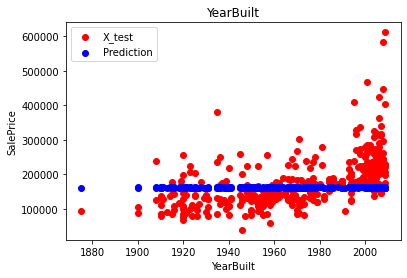

In [51]:
plt.scatter(X_test[:,1], Y_test, color = 'red')
plt.scatter(X_test[:,1], svr.predict(X_test), color = 'blue')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

## Decision Tree Regressor

In [49]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [50]:
MSE_tree = mean_squared_error(Y_test, decision_tree.predict(X_test))
print("mean_squared_error:", MSE_tree)

mean_squared_error: 2223316506.4879756


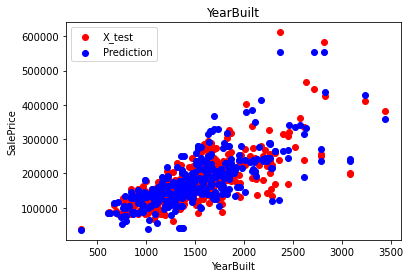

In [53]:
plt.scatter(X_test[:,0], Y_test, color = 'red')
plt.scatter(X_test[:,0], decision_tree.predict(X_test), color = 'blue')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

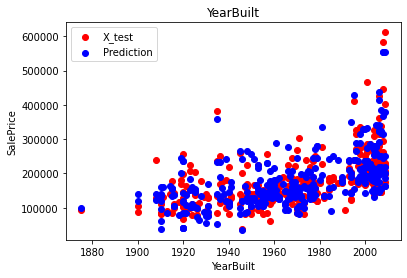

In [54]:
plt.scatter(X_test[:,1], Y_test, color = 'red')
plt.scatter(X_test[:,1], decision_tree.predict(X_test), color = 'blue')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

## Random Forest Regressor

In [55]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
MSE_forest = mean_squared_error(Y_test, random_forest.predict(X_test))
print("mean_squared_error:", MSE_forest)

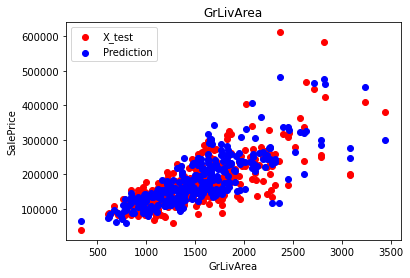

In [58]:
plt.scatter(X_test[:,0], Y_test, color = 'red')
plt.scatter(X_test[:,0], random_forest.predict(X_test), color = 'blue')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

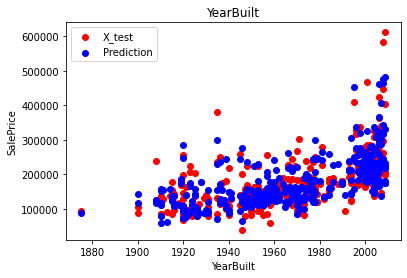

In [59]:
plt.scatter(X_test[:,1], Y_test, color = 'red')
plt.scatter(X_test[:,1], random_forest.predict(X_test), color = 'blue')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X_test","Prediction"])
plt.show()

In [66]:
table = pd.DataFrame(data = [MSE_linear, MSE_svr, MSE_tree, MSE_forest], columns = ["Mean Squared Error"])
table.index = ["Linear regression", "SVR", "Decision tree", "Random forest"]
display(table)

,Mean Squared Error
Linear regression,1.796050e+09
SVR,5.560117e+09
Decision tree,2.223317e+09
Random forest,1.535728e+09


<blockquote>
    <ul>
        <li><b>Random Forest</b> has the best index value while <b>Linear Regression</b> comes second follows by <b>Decision Tree</b> and <b>SVR</b></li>
        <li>Since <b>Random Forest</b> has the least mean squared error, the blue dots aren't far from the red dot as much as the others.</li>
        <li>However, <b>SVR</b> has the most interesting predictions where most of them are on just a few values making them almost as a straight horizontal line.</li>
    </ul>
</blockquote>